In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and Inspecting the data

In [3]:
# Loading and checking the first five rows of the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Total number of rows and columns
df.shape

(9240, 37)

In [5]:
# Data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [7]:
# Dropping Prospect ID and Lead Number as they are unique identifiers
# Also they do not contribute any information in lead converison
df.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

In [8]:
df = df.replace('Select', np.nan)

In [9]:
# Checking the missing values in total - column wise
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
# As we see from above, a lot of columns have missing values.
# If we try to impute them all then we will deivate the actual findings by a huge margin.
# However if we drop rows with missing values then we would eliminate minimum 78.46% of the data out 9240 rows.
# Hence a mixed approach seems viable - dropping columns/rows and imputing the rest.

In [11]:
# Removing rows wherein below mentioned columns have null values. As count/percentage of null values is very less.
df = df[~pd.isnull(df['Lead Source'])]
df = df[~pd.isnull(df['TotalVisits'])]
df = df[~pd.isnull(df['Page Views Per Visit'])]
df = df[~pd.isnull(df['Last Activity'])]

In [12]:
# Dropping the below mentioned columns as percentage is too high to impute/remove the corresponding rows
df.drop(['How did you hear about X Education','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [13]:
# Dropping rows wherein below mentioned column - Tags had null values as imputing will introduce high bias
# Also the column seems important for analysis.
df = df[~pd.isnull(df['Tags'])]
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          19.89
Specialization                                   24.00
What is your current occupation                   1.41
What matters most to you in choosing a course     1.41
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
# Remaining count of rows and columns
df.shape

(5747, 27)

In [15]:
# Checking the distribution of Country
df['Country'].value_counts()

India                   4411
United States             43
United Arab Emirates      38
Singapore                 16
Saudi Arabia              16
United Kingdom            11
Australia                  9
Qatar                      8
Hong Kong                  6
Oman                       5
Bahrain                    5
France                     5
Nigeria                    3
South Africa               3
Kuwait                     3
Germany                    2
Canada                     2
Netherlands                2
Philippines                2
Uganda                     2
Malaysia                   1
Denmark                    1
Italy                      1
Kenya                      1
Bangladesh                 1
Indonesia                  1
Sweden                     1
Ghana                      1
Tanzania                   1
China                      1
Sri Lanka                  1
Vietnam                    1
Name: Country, dtype: int64

In [16]:
# Imputing the null values in Country column with mode
df.loc[pd.isnull(df['Country']),['Country']] = 'India'

In [17]:
# Removing rows wherein below mentioned columns have null values as count/percentage of null values is very less.
df = df[~pd.isnull(df['What is your current occupation'])]
df = df[~pd.isnull(df['What matters most to you in choosing a course'])]

In [18]:
# Checking the distribution
df['Specialization'].value_counts()

Finance Management                   713
Marketing Management                 634
Human Resource Management            633
Operations Management                370
Business Administration              295
IT Projects Management               263
Supply Chain Management              263
Banking, Investment And Insurance    258
Media and Advertising                153
Travel and Tourism                   141
International Business               129
Healthcare Management                119
Hospitality Management                85
E-COMMERCE                            75
Retail Management                     74
Rural and Agribusiness                55
E-Business                            39
Services Excellence                   22
Name: Specialization, dtype: int64

In [19]:
# Using others to fill the null values as visitor might be a student or his area of expertise might be missing.
df['Specialization'] = df['Specialization'].fillna('Others')

In [20]:
# Verifying if any columns still has any null values.
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [21]:
# Checking the categorical variable to verify total available data
df['I agree to pay the amount through cheque'].value_counts()

No    5666
Name: I agree to pay the amount through cheque, dtype: int64

In [22]:
# Dropping few columns as they do not capture any variance at all.
df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

#### Outliers

In [23]:
# Checking for outliers
df.describe(percentiles=[0.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5666.000000,5666.000000,5666.000000,5666.000000
mean,0.452877,3.724497,543.632369,2.582031
std,0.497818,4.921537,563.463335,2.062967
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,56.000000,1.250000
50%,0.000000,3.000000,298.000000,2.000000
75%,1.000000,5.000000,1026.750000,4.000000
90%,1.000000,8.000000,1438.000000,5.000000
95%,1.000000,10.000000,1597.500000,6.000000
99%,1.000000,17.350000,1850.350000,9.000000


In [24]:
# As we see that there are outliers present in the data but it can also serve as a predictor.
# Hence we leave these outliers as it is.

In [25]:
df.shape

(5666, 22)

#### Converting binary variables to 0/1

In [26]:
# List of variables to map
var = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the function for mapping
def binary_map(x):
    return x.map({'Yes':1,'No':0})

# Applying the above function
df[var] = df[var].apply(binary_map)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 9239
Data columns (total 22 columns):
Lead Origin                                      5666 non-null object
Lead Source                                      5666 non-null object
Do Not Email                                     5666 non-null int64
Do Not Call                                      5666 non-null int64
Converted                                        5666 non-null int64
TotalVisits                                      5666 non-null float64
Total Time Spent on Website                      5666 non-null int64
Page Views Per Visit                             5666 non-null float64
Last Activity                                    5666 non-null object
Country                                          5666 non-null object
Specialization                                   5666 non-null object
What is your current occupation                  5666 non-null object
What matters most to you in choosing a course    5666 n

#### Converting the remaining categorical variable with multiple level

In [28]:
# Creating dummy variable for remaining categoricals and dropping the first one.
var_dummy = pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','Last Notable Activity']],drop_first=True)

# Adding the results to the final dataframe
df = pd.concat([df,var_dummy],axis=1)

In [29]:
# Dropping the repeated variables
df.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','Last Notable Activity'],axis=1,inplace=True)

In [30]:
df.shape

(5666, 140)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 9239
Columns: 140 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(11), uint8(127)
memory usage: 1.3 MB


### Test Train Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Keeping the feature variable in X
X = df.drop(['Converted'],axis=1)

In [34]:
# Keeping the result variable in y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [35]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

/Users/rishabhkashyap/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rishabhkashyap/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4145,0,0,0.345698,0.977481,-0.027506,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8533,0,0,-0.444374,-0.697122,-0.268627,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3876,0,0,-0.971089,-0.958558,-1.233113,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7113,0,0,-0.181017,0.136647,-0.509749,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7107,0,0,-0.444374,-0.907331,-0.268627,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# Checking the conversion rate
con = (sum(df['Converted'])/len(df['Converted'].index))*100
con

45.287680903635724

We have 45.29% of conversion rate.

#### Correlation

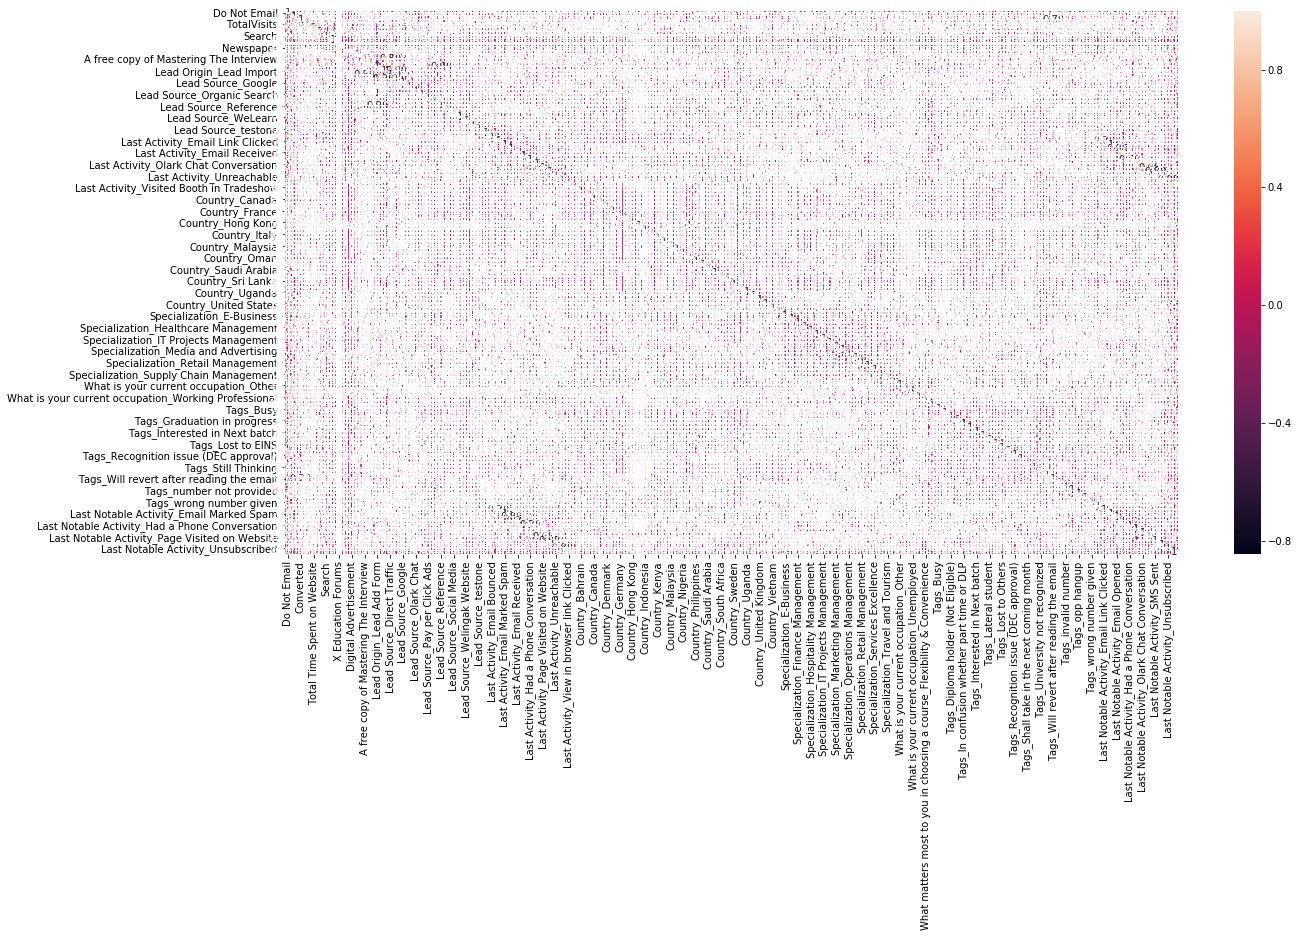

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Model Building

#### Using RFE for the initial model

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)  # using 15 variable in RFE

In [41]:
rfe = rfe.fit(X_train,y_train)
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False, False,

In [42]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 15),
 ('Do Not Call', False, 79),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 56),
 ('Search', False, 100),
 ('Newspaper Article', False, 68),
 ('X Education Forums', False, 117),
 ('Newspaper', False, 61),
 ('Digital Advertisement', False, 94),
 ('Through Recommendations', False, 71),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 78),
 ('Lead Origin_Lead Add Form', False, 5),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 91),
 ('Lead Source_Olark Chat', False, 39),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Pay per Click Ads', False, 121),
 ('Lead Source_Press_Release', False, 110),
 ('Lead Source_Reference', False, 88),
 ('Lead Source_Referral Sites', False, 55),
 ('Lead Source_Soc

In [43]:
col = X_train.columns[rfe.support_]

In [44]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=124)

#### Assessing the model with statsmodels

In [45]:
import statsmodels.api as sm

In [46]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3950
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -520.02
Date:                Sun, 25 Aug 2019   Deviance:                       1040.0
Time:                        20:35:58   Pearson chi2:                 3.62e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.1501      0.218    -14.432      0.000      -3.578      -2.722
Last Activity_SMS Sent                             1.5773      0.213      7.401      0.000       1.160       1.995
Country_Germany                                   29.4155   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Tags_Busy                                          2.5828      0.296      8.725      0.000       2.003       3.163
Tags_Closed by Horizzon                            9.1639      1.026      8.933      0.000       7.153      11.174
Tags_Interested in Next batch                     26.1390   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                  7.0966      0.629     11.285      0.000       5.864       8.329
Tags_Not doing further education                  -1.0007      1.026     -0.975      0.329      -3.011       1.010
Tags_Ringing                                      -0.9360      0.309     -3.025      0.002      -1.542      -0.330
Tags_Will revert after reading the email           6.3720      0.252     25.258      0.000       5.878       6.866
Tags_invalid number                               -1.5534      1.046     -1.486      0.137      -3.603       0.496
Tags_number not provided                         -22.1346   2.91e+04     -0.001      0.999   -5.71e+04     5.7e+04
Tags_switched off                                 -1.6993      0.636     -2.671      0.008      -2.946      -0.452
Tags_wrong number given                          -22.0857   2.39e+04     -0.001      0.999   -4.68e+04    4.68e+04
Last Notable Activity_Had a Phone Conversation    25.1452    3.6e+04      0.001      0.999   -7.04e+04    7.05e+04
Last Notable Activity_Modified                    -1.0815      0.213     -5.074      0.000      -1.499      -0.664
==================================================================================================================
"""

In [47]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4145    0.961648
8533    0.041086
3876    0.075239
7113    0.991830
7107    0.014321
2399    0.976284
1640    0.016527
2900    0.894766
2243    0.894766
3608    0.961648
dtype: float64

In [48]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.96164812, 0.04108607, 0.07523893, ..., 0.96164812, 0.07523893,
       0.02684823])

In [49]:
# Creating dataframe with acutal conversion flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,0,0.961648
1,0,0.041086
2,0,0.075239
3,1,0.991830
4,0,0.014321


In [50]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.961648,1
1,0,0.041086,0
2,0,0.075239,0
3,1,0.991830,1
4,0,0.014321,0


In [51]:
from sklearn import metrics

In [52]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[2057,   74],
       [  87, 1748]])

In [53]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9594049420070601

In [54]:
# VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Create dataframe that wuk contain the names of all the feature variable and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Country_Germany,1.0
2,Tags_Busy,1.0
3,Tags_Closed by Horizzon,1.0
4,Tags_Interested in Next batch,1.0
5,Tags_Lost to EINS,1.0
6,Tags_Not doing further education,1.0
9,Tags_invalid number,1.0
10,Tags_number not provided,1.0
11,Tags_switched off,1.0
12,Tags_wrong number given,1.0


In [56]:
col = col.drop('Country_Germany', 1)
col

Index(['Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in Next batch', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

In [57]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3951
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -524.71
Date:                Sun, 25 Aug 2019   Deviance:                       1049.4
Time:                        20:35:59   Pearson chi2:                 3.56e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.1421      0.218    -14.427      0.000      -3.569      -2.715
Last Activity_SMS Sent                             1.5414      0.211      7.291      0.000       1.127       1.956
Tags_Busy                                          2.5982      0.296      8.792      0.000       2.019       3.177
Tags_Closed by Horizzon                            9.1594      1.026      8.929      0.000       7.149      11.170
Tags_Interested in Next batch                     26.1668   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                  7.0941      0.629     11.282      0.000       5.862       8.327
Tags_Not doing further education                  -1.0038      1.026     -0.979      0.328      -3.014       1.007
Tags_Ringing                                      -0.9179      0.309     -2.975      0.003      -1.523      -0.313
Tags_Will revert after reading the email           6.3714      0.252     25.268      0.000       5.877       6.866
Tags_invalid number                               -1.5339      1.045     -1.468      0.142      -3.582       0.515
Tags_number not provided                         -22.1162   2.91e+04     -0.001      0.999   -5.71e+04    5.71e+04
Tags_switched off                                 -1.3830      0.566     -2.443      0.015      -2.493      -0.273
Tags_wrong number given                          -22.0663   2.39e+04     -0.001      0.999   -4.69e+04    4.68e+04
Last Notable Activity_Had a Phone Conversation    25.1373    3.6e+04      0.001      0.999   -7.04e+04    7.05e+04
Last Notable Activity_Modified                    -1.0844      0.213     -5.096      0.000      -1.501      -0.667
==================================================================================================================
"""

In [58]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.96192174, 0.04140414, 0.0745626 , ..., 0.96192174, 0.0745626 ,
       0.02651843])

In [59]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [60]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.961922,1
1,0,0.041404,0
2,0,0.074563,0
3,1,0.991596,1
4,0,0.014393,0


In [61]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9591527987897126

In [62]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Tags_Busy,1.0
2,Tags_Closed by Horizzon,1.0
3,Tags_Interested in Next batch,1.0
4,Tags_Lost to EINS,1.0
5,Tags_Not doing further education,1.0
8,Tags_invalid number,1.0
9,Tags_number not provided,1.0
10,Tags_switched off,1.0
11,Tags_wrong number given,1.0
12,Last Notable Activity_Had a Phone Conversation,1.0


In [63]:
col = col.drop('Tags_Interested in Next batch')
col

Index(['Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

In [64]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3952
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -528.18
Date:                Sun, 25 Aug 2019   Deviance:                       1056.4
Time:                        20:35:59   Pearson chi2:                 3.61e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0810      0.212    -14.546      0.000      -3.496      -2.666
Last Activity_SMS Sent                             1.6001      0.211      7.569      0.000       1.186       2.014
Tags_Busy                                          2.5041      0.291      8.605      0.000       1.934       3.074
Tags_Closed by Horizzon                            9.1175      1.025      8.896      0.000       7.109      11.126
Tags_Lost to EINS                                  7.0500      0.627     11.237      0.000       5.820       8.280
Tags_Not doing further education                  -1.0576      1.025     -1.032      0.302      -3.066       0.951
Tags_Ringing                                      -1.0199      0.304     -3.352      0.001      -1.616      -0.423
Tags_Will revert after reading the email           6.3107      0.247     25.505      0.000       5.826       6.796
Tags_invalid number                               -1.6381      1.044     -1.569      0.117      -3.685       0.409
Tags_number not provided                         -22.2176    2.9e+04     -0.001      0.999    -5.7e+04    5.69e+04
Tags_switched off                                 -1.4898      0.564     -2.642      0.008      -2.595      -0.385
Tags_wrong number given                          -22.1663   2.38e+04     -0.001      0.999   -4.67e+04    4.67e+04
Last Notable Activity_Had a Phone Conversation    25.0739   3.59e+04      0.001      0.999   -7.03e+04    7.04e+04
Last Notable Activity_Modified                    -1.1122      0.211     -5.261      0.000      -1.526      -0.698
==================================================================================================================
"""

In [65]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.96193646, 0.04389866, 0.07580915, ..., 0.96193646, 0.07580915,
       0.02626596])

In [66]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [67]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.961936,1
1,0,0.043899,0
2,0,0.075809,0
3,1,0.992075,1
4,0,0.014874,0


In [68]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9586485123550177

In [69]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Tags_Busy,1.0
2,Tags_Closed by Horizzon,1.0
3,Tags_Lost to EINS,1.0
4,Tags_Not doing further education,1.0
7,Tags_invalid number,1.0
8,Tags_number not provided,1.0
9,Tags_switched off,1.0
10,Tags_wrong number given,1.0
11,Last Notable Activity_Had a Phone Conversation,1.0
0,Last Activity_SMS Sent,0.0


In [70]:
col = col.drop('Tags_number not provided')
col

Index(['Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

In [71]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3953
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -529.88
Date:                Sun, 25 Aug 2019   Deviance:                       1059.8
Time:                        20:36:00   Pearson chi2:                 3.59e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.1383      0.212    -14.792      0.000      -3.554      -2.722
Last Activity_SMS Sent                             1.5607      0.208      7.495      0.000       1.153       1.969
Tags_Busy                                          2.5830      0.288      8.971      0.000       2.019       3.147
Tags_Closed by Horizzon                            9.1590      1.025      8.935      0.000       7.150      11.168
Tags_Lost to EINS                                  7.0929      0.628     11.300      0.000       5.863       8.323
Tags_Not doing further education                  -1.0069      1.025     -0.982      0.326      -3.016       1.002
Tags_Ringing                                      -0.9353      0.300     -3.115      0.002      -1.524      -0.347
Tags_Will revert after reading the email           6.3662      0.248     25.714      0.000       5.881       6.851
Tags_invalid number                               -1.5520      1.043     -1.488      0.137      -3.596       0.492
Tags_switched off                                 -1.4020      0.561     -2.497      0.013      -2.502      -0.302
Tags_wrong number given                          -21.0830   1.45e+04     -0.001      0.999   -2.84e+04    2.84e+04
Last Notable Activity_Had a Phone Conversation    24.1309   2.18e+04      0.001      0.999   -4.27e+04    4.27e+04
Last Notable Activity_Modified                    -1.0898      0.212     -5.149      0.000      -1.505      -0.675
==================================================================================================================
"""

In [72]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.96187167, 0.04155469, 0.07495968, ..., 0.96187167, 0.07495968,
       0.02652683])

In [73]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [74]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.961872,1
1,0,0.041555,0
2,0,0.074960,0
3,1,0.991745,1
4,0,0.014370,0


In [75]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9586485123550177

In [76]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Tags_Busy,1.0
2,Tags_Closed by Horizzon,1.0
3,Tags_Lost to EINS,1.0
4,Tags_Not doing further education,1.0
7,Tags_invalid number,1.0
8,Tags_switched off,1.0
9,Tags_wrong number given,1.0
10,Last Notable Activity_Had a Phone Conversation,1.0
0,Last Activity_SMS Sent,0.0
5,Tags_Ringing,0.0


In [77]:
col = col.drop('Tags_wrong number given')
col

Index(['Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified'],
      dtype='object')

In [78]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3954
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.10
Date:                Sun, 25 Aug 2019   Deviance:                       1064.2
Time:                        20:36:00   Pearson chi2:                 3.58e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.2090      0.213    -15.073      0.000      -3.626      -2.792
Last Activity_SMS Sent                             1.5126      0.205      7.389      0.000       1.111       1.914
Tags_Busy                                          2.6813      0.285      9.422      0.000       2.124       3.239
Tags_Closed by Horizzon                            9.2170      1.025      8.988      0.000       7.207      11.227
Tags_Lost to EINS                                  7.1528      0.628     11.389      0.000       5.922       8.384
Tags_Not doing further education                  -0.9406      1.025     -0.918      0.359      -2.950       1.069
Tags_Ringing                                      -0.8313      0.296     -2.807      0.005      -1.412      -0.251
Tags_Will revert after reading the email           6.4384      0.248     25.986      0.000       5.953       6.924
Tags_invalid number                               -1.4461      1.041     -1.389      0.165      -3.487       0.595
Tags_switched off                                 -1.2940      0.559     -2.316      0.021      -2.389      -0.199
Last Notable Activity_Had a Phone Conversation    23.2018   1.32e+04      0.002      0.999   -2.59e+04    2.59e+04
Last Notable Activity_Modified                    -1.0708      0.212     -5.052      0.000      -1.486      -0.655
==================================================================================================================
"""

In [79]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.96192432, 0.03882841, 0.07394049, ..., 0.96192432, 0.07394049,
       0.02663553])

In [80]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [81]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.961924,1
1,0,0.038828,0
2,0,0.073940,0
3,1,0.991354,1
4,0,0.013656,0


In [82]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9586485123550177

In [83]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Tags_Busy,1.0
2,Tags_Closed by Horizzon,1.0
3,Tags_Lost to EINS,1.0
4,Tags_Not doing further education,1.0
7,Tags_invalid number,1.0
8,Tags_switched off,1.0
9,Last Notable Activity_Had a Phone Conversation,1.0
0,Last Activity_SMS Sent,0.0
5,Tags_Ringing,0.0
6,Tags_Will revert after reading the email,0.0


In [84]:
col = col.drop('Last Notable Activity_Had a Phone Conversation')
col

Index(['Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified'],
      dtype='object')

In [85]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3955
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -535.67
Date:                Sun, 25 Aug 2019   Deviance:                       1071.3
Time:                        20:36:01   Pearson chi2:                 3.59e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1634      0.209    -15.107      0.000      -3.574      -2.753
Last Activity_SMS Sent                       1.4988      0.204      7.347      0.000       1.099       1.899
Tags_Busy                                    2.6481      0.283      9.374      0.000       2.094       3.202
Tags_Closed by Horizzon                      9.1884      1.025      8.965      0.000       7.180      11.197
Tags_Lost to EINS                            7.1258      0.627     11.358      0.000       5.896       8.355
Tags_Not doing further education            -0.9747      1.025     -0.951      0.341      -2.983       1.033
Tags_Ringing                                -0.8657      0.294     -2.944      0.003      -1.442      -0.289
Tags_Will revert after reading the email     6.4118      0.245     26.130      0.000       5.931       6.893
Tags_invalid number                         -1.4799      1.041     -1.422      0.155      -3.519       0.560
Tags_switched off                           -1.3275      0.558     -2.381      0.017      -2.420      -0.235
Last Notable Activity_Modified              -1.0924      0.211     -5.170      0.000      -1.507      -0.678
============================================================================================================
"""

In [86]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.96261489, 0.0405668 , 0.07376583, ..., 0.96261489, 0.07376583,
       0.02601828])

In [87]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [88]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.962615,1
1,0,0.040567,0
2,0,0.073766,0
3,1,0.991399,1
4,0,0.013984,0


In [89]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9583963691376702

In [90]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Tags_Busy,1.0
2,Tags_Closed by Horizzon,1.0
3,Tags_Lost to EINS,1.0
4,Tags_Not doing further education,1.0
7,Tags_invalid number,1.0
8,Tags_switched off,1.0
0,Last Activity_SMS Sent,0.0
5,Tags_Ringing,0.0
6,Tags_Will revert after reading the email,0.0
9,Last Notable Activity_Modified,0.0


In [91]:
col = col.drop('Tags_Not doing further education')
col

Index(['Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified'],
      dtype='object')

In [92]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3956
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -536.29
Date:                Sun, 25 Aug 2019   Deviance:                       1072.6
Time:                        20:36:01   Pearson chi2:                 3.61e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2162      0.206    -15.586      0.000      -3.621      -2.812
Last Activity_SMS Sent                       1.5085      0.205      7.376      0.000       1.108       1.909
Tags_Busy                                    2.6959      0.281      9.586      0.000       2.145       3.247
Tags_Closed by Horizzon                      9.2465      1.024      9.028      0.000       7.239      11.254
Tags_Lost to EINS                            7.1835      0.626     11.474      0.000       5.956       8.411
Tags_Ringing                                -0.8193      0.293     -2.796      0.005      -1.394      -0.245
Tags_Will revert after reading the email     6.4656      0.243     26.646      0.000       5.990       6.941
Tags_invalid number                         -1.4340      1.040     -1.378      0.168      -3.473       0.605
Tags_switched off                           -1.2820      0.557     -2.301      0.021      -2.374      -0.190
Last Notable Activity_Modified              -1.0997      0.211     -5.210      0.000      -1.513      -0.686
============================================================================================================
"""

In [93]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.96265171, 0.03856202, 0.07399009, ..., 0.96265171, 0.07399009,
       0.02591446])

In [94]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [95]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.962652,1
1,0,0.038562,0
2,0,0.073990,0
3,1,0.991490,1
4,0,0.013178,0


In [96]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9583963691376702

In [97]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Tags_Busy,1.0
2,Tags_Closed by Horizzon,1.0
3,Tags_Lost to EINS,1.0
6,Tags_invalid number,1.0
7,Tags_switched off,1.0
0,Last Activity_SMS Sent,0.0
4,Tags_Ringing,0.0
5,Tags_Will revert after reading the email,0.0
8,Last Notable Activity_Modified,0.0


In [98]:
col = col.drop('Tags_invalid number')
col

Index(['Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified'],
      dtype='object')

In [99]:
# Let's re-run the model using the updated variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3966
Model:                            GLM   Df Residuals:                     3957
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -537.73
Date:                Sun, 25 Aug 2019   Deviance:                       1075.5
Time:                        20:36:01   Pearson chi2:                 3.59e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3008      0.205    -16.132      0.000      -3.702      -2.900
Last Activity_SMS Sent                       1.4605      0.201      7.280      0.000       1.067       1.854
Tags_Busy                                    2.8064      0.275     10.201      0.000       2.267       3.346
Tags_Closed by Horizzon                      9.3109      1.024      9.091      0.000       7.303      11.318
Tags_Lost to EINS                            7.2496      0.626     11.581      0.000       6.023       8.477
Tags_Ringing                                -0.7026      0.286     -2.457      0.014      -1.263      -0.142
Tags_Will revert after reading the email     6.5482      0.241     27.175      0.000       6.076       7.021
Tags_switched off                           -1.1611      0.553     -2.100      0.036      -2.245      -0.077
Last Notable Activity_Modified              -1.0709      0.211     -5.065      0.000      -1.485      -0.657
============================================================================================================
"""

In [100]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.962582  , 0.03554517, 0.07290789, ..., 0.962582  , 0.07290789,
       0.02624234])

In [101]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [102]:
# Creating new column 'Predicted'with 1 if conversion prob>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,0,0.962582,1
1,0,0.035545,0
2,0,0.072908,0
3,1,0.991057,1
4,0,0.012472,0


In [103]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9583963691376702

In [104]:
# Create dataframe that wuk contain the names of all the feature variable and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,Tags_Busy,1.0
2,Tags_Closed by Horizzon,1.0
3,Tags_Lost to EINS,1.0
6,Tags_switched off,1.0
0,Last Activity_SMS Sent,0.0
4,Tags_Ringing,0.0
5,Tags_Will revert after reading the email,0.0
7,Last Notable Activity_Modified,0.0


The accuracy remained practically the same throughout the models.
We have created eight models in process to remove variables with high p-value.

### Metrics - Sensitivity & Specificity

In [105]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [106]:
# Let's check the sensitivity of our model
TP/float(TP+FN)

0.9525885558583106

In [107]:
# Specificity
TN/float(TN+FP)

0.9652745190051619

#### ROC Curve

In [108]:
def draw_roc(acutal, probs):
    fpr, tpr, thresholds = metrics.roc_curve(acutal, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(acutal, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating charateristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate=False)

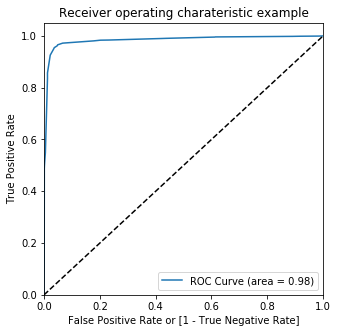

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

### Optimal Cutoff Point

In [111]:
# Creating columns with different probability cut-offs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.962582,1,1,1,1,1,1,1,1,1,1,1
1,0,0.035545,0,1,0,0,0,0,0,0,0,0,0
2,0,0.072908,0,1,0,0,0,0,0,0,0,0,0
3,1,0.991057,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012472,0,1,0,0,0,0,0,0,0,0,0


In [112]:
# Calculating accuracy, sensitivity and specificity for various probability cut-offs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.462683  1.000000  0.000000
0.1   0.1  0.951336  0.972207  0.933365
0.2   0.2  0.957136  0.961853  0.953074
0.3   0.3  0.957136  0.961853  0.953074
0.4   0.4  0.959405  0.954768  0.963397
0.5   0.5  0.958396  0.950409  0.965275
0.6   0.6  0.958396  0.950409  0.965275
0.7   0.7  0.958396  0.950409  0.965275
0.8   0.8  0.953858  0.925886  0.977945
0.9   0.9  0.927383  0.857221  0.987799


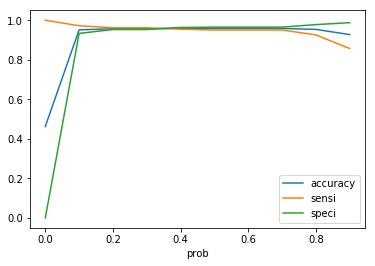

In [113]:
# Plot of accuracy, sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 is the optimum point to take it as a cutoff probability

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.962582,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.035545,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.072908,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.991057,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012472,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
# Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9594049420070601

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[2053,   78],
       [  83, 1752]])

In [117]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [118]:
# Sensitivity
TP/float(TP+FN)

0.9547683923705722

In [119]:
# Specificity
TN/float(TN+FP)

0.9633974659784139

### Prediction on Test Set

In [120]:
X_test = X_test[col]
X_test.head()

,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified
1392,0,0,0,0,0,0,0,1
3123,0,0,0,0,0,1,0,0
8181,1,0,0,0,1,0,0,0
3791,0,0,0,0,1,0,0,0
4318,1,0,0,0,0,1,0,0


In [121]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [122]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1392    0.012472
3123    0.962582
8181    0.072908
3791    0.017928
4318    0.991057
6302    0.992890
5010    0.997552
344     0.006217
6483    0.035545
7820    0.962582
dtype: float64

In [123]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
1392,0.012472
3123,0.962582
8181,0.072908
3791,0.017928
4318,0.991057


In [124]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Converted,0
1392,0,0.012472
3123,1,0.962582
8181,0,0.072908
3791,0,0.017928
4318,1,0.991057


In [125]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0:'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
1392,0,0.012472
3123,1,0.962582
8181,0,0.072908
3791,0,0.017928
4318,1,0.991057


In [126]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x >0.4 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
1392,0,0.012472,0
3123,1,0.962582,1
8181,0,0.072908,0
3791,0,0.017928,0
4318,1,0.991057,1


In [127]:
# Overall Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9623529411764706

In [128]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion3

array([[942,  27],
       [ 37, 694]])

In [129]:
TP = confusion3[1,1]
TN = confusion3[0,0]
FP = confusion3[0,1]
FN = confusion3[1,0]

In [130]:
# Final sensitivity on the test set
TP/float(TP+FN)

0.9493844049247606

In [131]:
# Final specificity on the test set
TN/float(TN+FP)

0.9721362229102167

Since we had the target - 80% conversion rate. This can be measured by sensitivity metric which is 94.9% on our test set and 95% on our train set. Hence we have fulfilled the requirement here.